In [15]:
import pandas as pd
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Select three datasets, large, medium, and small, as required
df_large = pd.read_csv('USERS.csv')
df_medium = pd.read_csv('WIKIPROJECTS.csv')
df_small = pd.read_csv('REQUESTS_FOR_COMMENT.csv')

Verify the size and accessibility of data

In [3]:
# data check
print(df_large.head())
print(df_medium.head())
print(df_small.head())



  thread_subject        username                          page_name
0     No subject  Liuxinyu970226  Usertalk000accountdeleted000.json
1     No subject      M2k~dewiki          Usertalk000selina000.json
2     No subject        Peaceray                Usertalk001Jrm.json
3     No subject  Liuxinyu970226             Usertalk007hemant.json
4     No subject          ToJack           Usertalk011ZezoTito.json
                                      thread_subject      username  \
0               Connect families with their members       Jneubert   
1   Integration of {{Q|36948990}}'s country/subje...      Jneubert   
2   Integration of {{Q|36948990}}'s country/subje...         Jura1   
3         English Wikipedia's WikiProject Newspapers  Bluerasberry   
4   Persons archive completed: data donation of Z...      Jneubert   

                                           page_name  
0  WikidatatalkWikiProject20thCenturyPressArchive...  
1  WikidatatalkWikiProject20thCenturyPressArchive...  
2  Wik

In [4]:
# data check
print('Large Dataset:')
print('data size:', df_large.size)
print('data shape:', df_large.shape)  # returns (rows, columns)
print('Medium Dataset:')
print('data size:', df_medium.size)
print('data shape:', df_medium.shape)  # returns (rows, columns)
print('Small Dataset:')
print('data size:', df_small.size)
print('data shape:', df_small.shape)  # returns (rows, columns)



Large Dataset:
data size: 515076
data shape: (171692, 3)
Medium Dataset:
data size: 35583
data shape: (11861, 3)
Small Dataset:
data size: 8775
data shape: (2925, 3)


In [5]:
def build_editor_network(df):
    G = nx.Graph()
    user_ids = {}  # 存储用户对应节点编号
    next_id = 0

    # 遍历每一个话题(thread)，并建立用户之间的连接
    grouped = df.groupby(['page_name', 'thread_subject'])
    
    for (page, thread), group in grouped:
        users = group['username'].unique()
        
        # 为每个用户分配ID
        for user in users:
            if user not in user_ids:
                user_ids[user] = next_id
                next_id += 1
                
        # 为在同一页面同一线程下评论的用户建立边
        for user_pair in combinations(users, 2):
            u1, u2 = user_ids[user_pair[0]], user_ids[user_pair[1]]
            if G.has_edge(u1, u2):
                G[u1][u2]['weight'] += 1
            else:
                G.add_edge(u1, u2, weight=1)
    
    return G, user_ids


In [6]:
G_large, user_ids_large = build_editor_network(df_small)

# 显示网络基本信息
print("Network info：")
print(f"节点数: {G_large.number_of_nodes()}")
print(f"边数: {G_large.number_of_edges()}")
print(f"网络密度: {nx.density(G_large):.6f}")



Network info：
节点数: 837
边数: 27569
网络密度: 0.078799


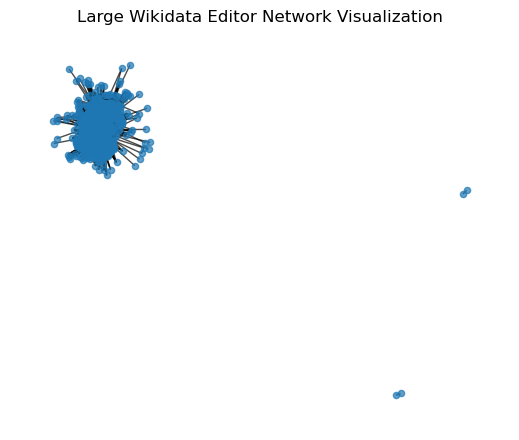

In [7]:
plt.figure(figsize=(5, 4))
nx.draw(G_large, node_size=20, alpha=0.7)
plt.title('Large Wikidata Editor Network Visualization')
plt.show()



In [8]:
# 网络基本信息
num_nodes = G_large.number_of_nodes()
num_edges = G_large.number_of_edges()
density = nx.density(G_large)
clustering_coeff = nx.average_clustering(G_large)

print("网络基本指标：")
print(f"节点数: {num_nodes}")
print(f"边数: {num_edges}")
print(f"网络密度: {density:.4f}")
print(f"平均聚类系数: {clustering_coeff:.4f}")


网络基本指标：
节点数: 837
边数: 27569
网络密度: 0.0788
平均聚类系数: 0.8294


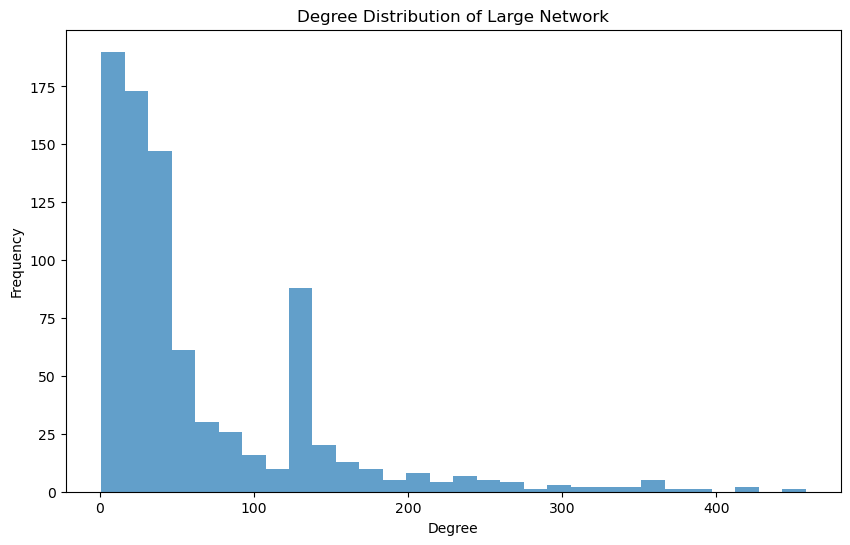

In [9]:
degrees = [degree for node, degree in G_large.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=30, alpha=0.7)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Large Network')
plt.show()


In [10]:
degree_centrality = nx.degree_centrality(G_large)

# 展示前5个最重要的节点
top5_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5节点的度中心性:")
for node, centrality in top5_nodes:
    print(f"节点 {node}: 中心性={centrality:.4f}")



Top 5节点的度中心性:
节点 66: 中心性=0.5478
节点 14: 中心性=0.5060
节点 105: 中心性=0.5000
节点 77: 中心性=0.4581
节点 34: 中心性=0.4474


In [11]:
if nx.is_connected(G_large):
    avg_path_length = nx.average_shortest_path_length(G_large)
    diameter = nx.diameter(G_large)
else:
    # 若非完全连通，只计算最大连通子图
    largest_cc = max(nx.connected_components(G_large), key=len)
    G_largest_cc = G_large.subgraph(largest_cc)
    
    avg_path_length = nx.average_shortest_path_length(G_largest_cc)
    diameter = nx.diameter(G_largest_cc)

print(f"平均最短路径长度: {avg_path_length:.4f}")
print(f"网络直径: {diameter}")


平均最短路径长度: 2.0867
网络直径: 4


In [12]:
G_random = nx.gnm_random_graph(num_nodes, num_edges)

# 计算随机网络的平均聚类系数和路径长度
random_clustering = nx.average_clustering(G_random)
if nx.is_connected(G_random):
    random_path_length = nx.average_shortest_path_length(G_random)
else:
    largest_cc_random = max(nx.connected_components(G_random), key=len)
    G_random_cc = G_random.subgraph(largest_cc_random)
    random_path_length = nx.average_shortest_path_length(G_random_cc)

print("随机网络指标：")
print(f"随机网络平均聚类系数: {random_clustering:.4f}")
print(f"随机网络平均最短路径长度: {random_path_length:.4f}")



随机网络指标：
随机网络平均聚类系数: 0.0792
随机网络平均最短路径长度: 1.9261


In [13]:


comparison = pd.DataFrame({
    "Metric": ["Clustering Coefficient", "Average Path Length"],
    "Wikidata Network": [clustering_coeff, avg_path_length],
    "Random Network": [random_clustering, random_path_length]
})

print(comparison)


                   Metric  Wikidata Network  Random Network
0  Clustering Coefficient          0.829445        0.079171
1     Average Path Length          2.086738        1.926100


In [16]:
suspected_trolls = np.random.choice(G_large.nodes(), 2, replace=False)
print("疑似troll的节点:", suspected_trolls)

# 计算疑似troll节点之间的最短路径
if nx.has_path(G_large, suspected_trolls[0], suspected_trolls[1]):
    shortest_path = nx.shortest_path(G_large, suspected_trolls[0], suspected_trolls[1])
    print(f"两个疑似节点之间的最短路径长度: {len(shortest_path)-1}")
    print("路径为:", shortest_path)
else:
    print("两个疑似节点之间没有直接或间接路径。")


疑似troll的节点: [541 232]
两个疑似节点之间的最短路径长度: 2
路径为: [541, 195, 232]
